# MSCA31010: Linear & Non-Linear Models Assignment 1

In [106]:
#Initializations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import itertools
import math
sns.set_theme(style="ticks")

In [107]:
data = pd.read_csv("Economy_2020_to_2022.csv")
data

,Year,Month,N_Week,PCEPI,CPIAUCSL,ICSA_Week1,ICSA_Week2,ICSA_Week3,ICSA_Week4,ICSA_Week5
0,2020,1,4,110.944,258.682,217000,203000,211000,200000,NaN
1,2020,2,5,111.07,259.007,191000,186000,190000,196000,"190,000.0"
2,2020,3,4,110.824,258.165,186000,221000,2914000,5946000,NaN
3,2020,4,4,110.237,256.094,6137000,4869000,4201000,3446000,NaN
4,2020,5,5,110.353,255.944,2796000,2335000,2176000,1921000,"1,639,000.0"
5,2020,6,4,110.746,257.217,1575000,1473000,1467000,1446000,NaN
6,2020,7,4,111.072,258.543,1413000,1468000,1393000,1260000,NaN
7,2020,8,5,111.411,259.58,1044000,884000,927000,876000,"881,000.0"
8,2020,9,4,111.613,260.19,892000,861000,859000,795000,NaN
9,2020,10,5,111.648,260.352,785000,839000,804000,776000,"773,000.0"


In [108]:
fig = px.scatter_matrix(data, dimensions=["PCEPI","CPIAUCSL","ICSA_Week1","ICSA_Week2","ICSA_Week3","ICSA_Week4","ICSA_Week5"],width=900,height=1000)
fig.show()

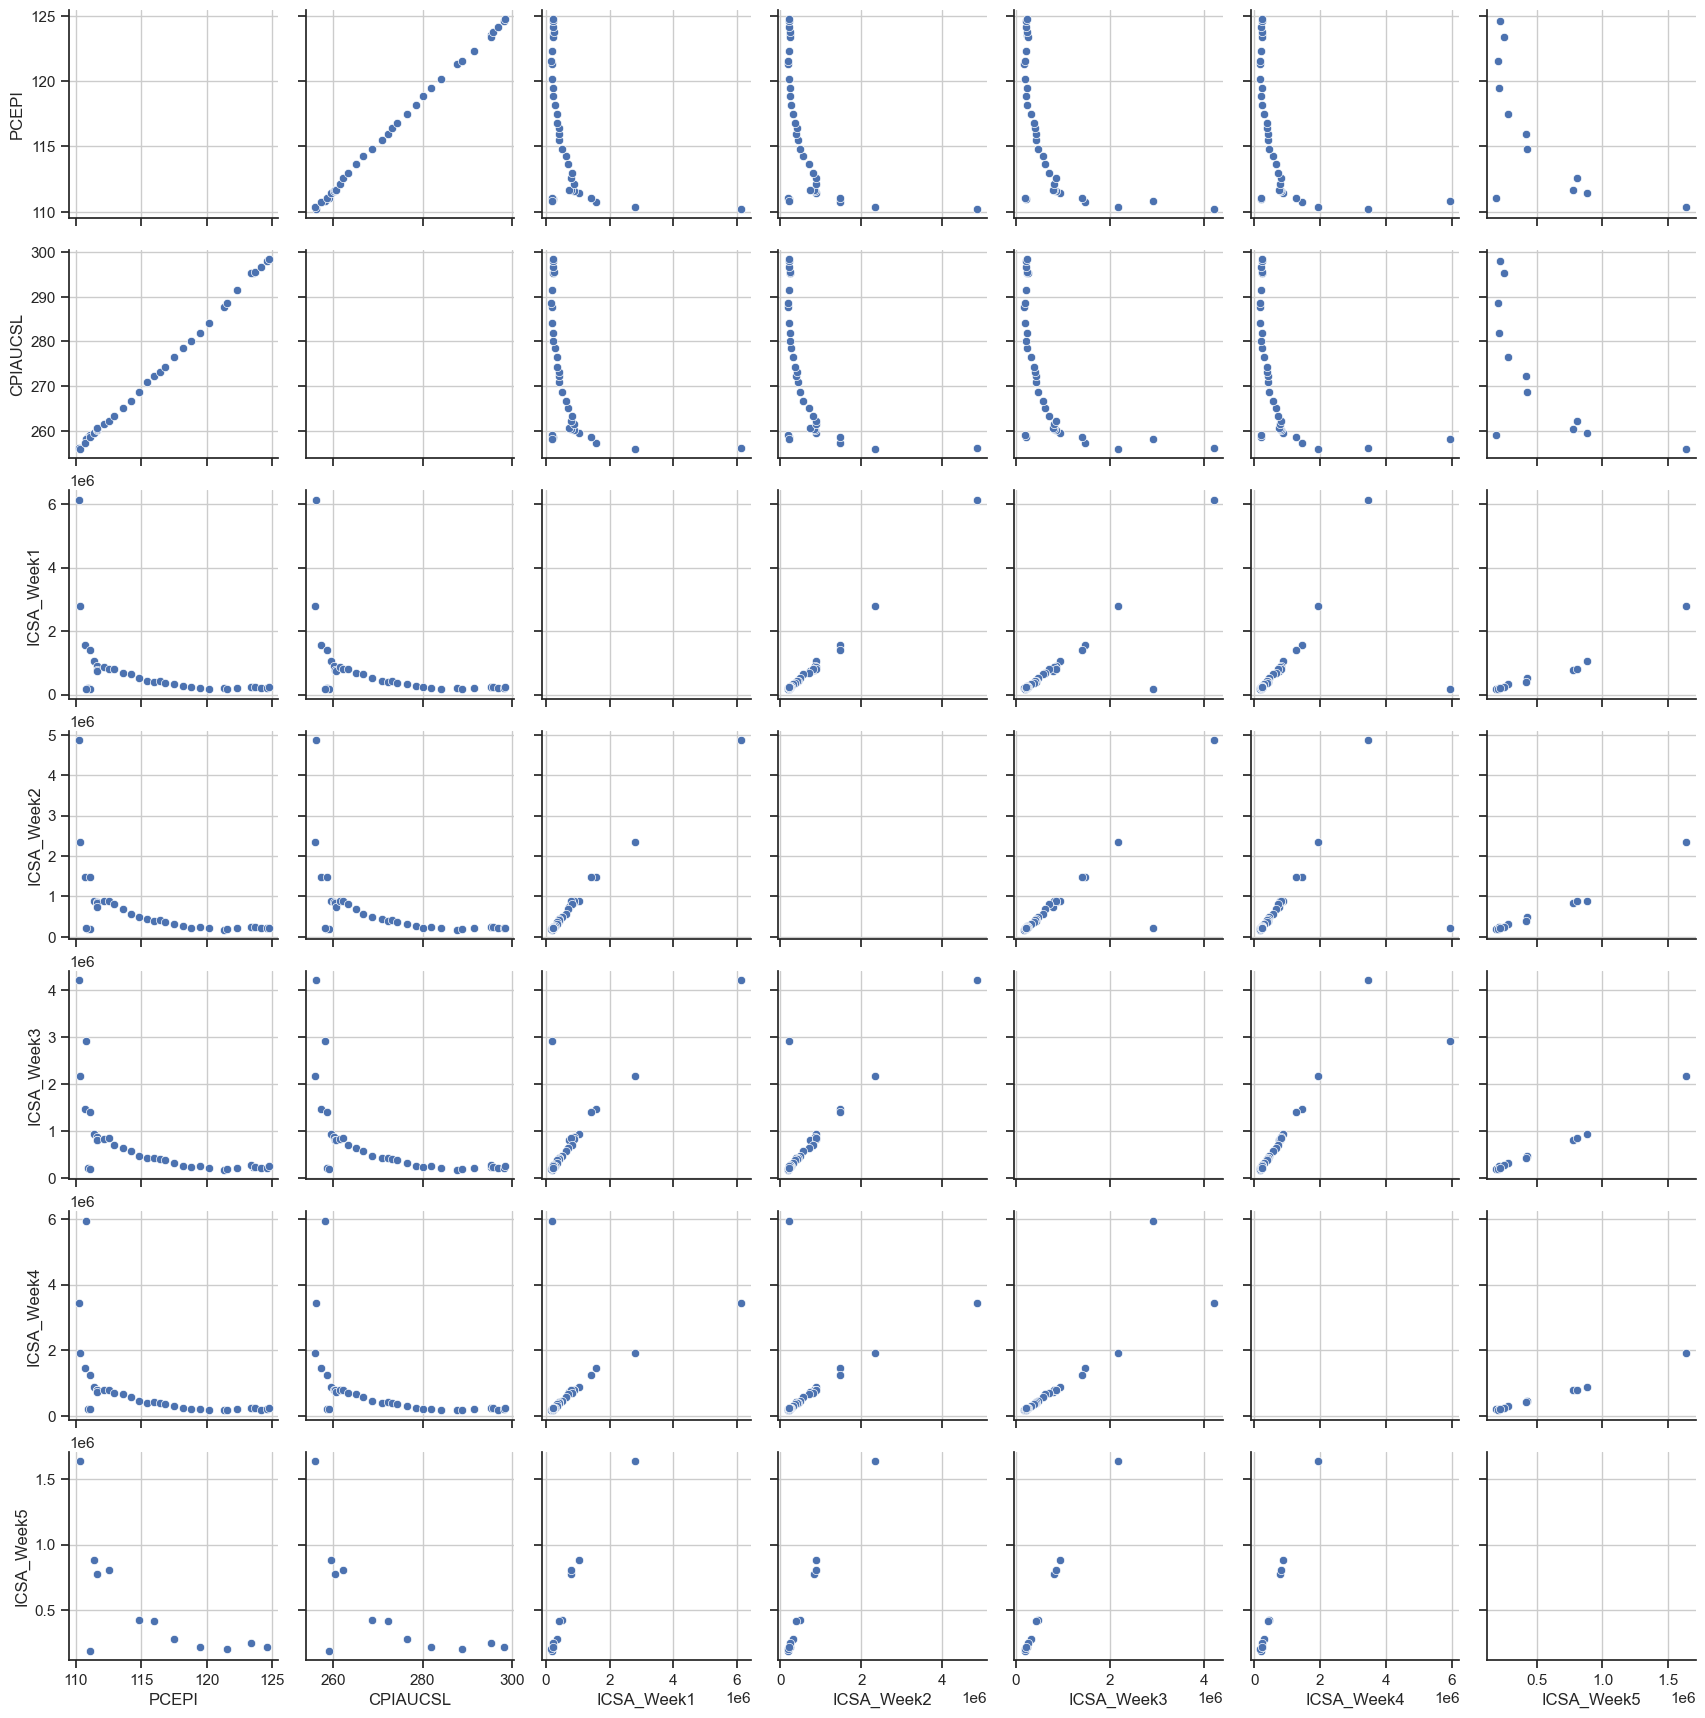

In [121]:
sns.set_style("ticks",{'axes.grid' : True})
g = sns.pairplot(data[["PCEPI","CPIAUCSL","ICSA_Week1","ICSA_Week2","ICSA_Week3","ICSA_Week4","ICSA_Week5"]],diag_kind="none")

In [122]:
pearson_correlation_coeffs = data[["PCEPI","CPIAUCSL","ICSA_Week1","ICSA_Week2","ICSA_Week3","ICSA_Week4","ICSA_Week5"]].corr(method='pearson')
pearson_correlation_coeffs = pearson_correlation_coeffs.round(4)


In [124]:
spearman_correlation_coeffs = data[["PCEPI","CPIAUCSL","ICSA_Week1","ICSA_Week2","ICSA_Week3","ICSA_Week4","ICSA_Week5"]].corr(method='spearman')
spearman_correlation_coeffs = spearman_correlation_coeffs.round(4)

spearman_correlation_coeffs.to_csv("spearman.csv")

In [125]:
kendall_correlation_coeffs = data[["PCEPI","CPIAUCSL","ICSA_Week1","ICSA_Week2","ICSA_Week3","ICSA_Week4","ICSA_Week5"]].corr(method='kendall')
kendall_correlation_coeffs = kendall_correlation_coeffs.round(4)

kendall_correlation_coeffs.to_csv("kendall.csv")

In [126]:
def AdjustedDistance (columns):
    #Calculate the Adjusted Distance for x

    column_x = columns.split(";")[0]
    column_y = columns.split(";")[1]
    dropped_rows = data[[column_x,column_y]].dropna()
    x = dropped_rows[[column_x]]
    y = dropped_rows[[column_y]]
    x = x.fillna(0)
    i = x.to_numpy().T[0]
    n = len(i)
    distance_matrix_x = pd.DataFrame(np.abs(i[:, None] - i))
    distance_matrix_x = distance_matrix_x.sub(distance_matrix_x.mean(axis=0),axis=1)
    distance_matrix_x = distance_matrix_x.sub(distance_matrix_x.mean(axis=1),axis=0)
    emp_dist_x = distance_matrix_x.pow(2)
    emp_dist_x = emp_dist_x.values.sum()/(n**2)
    #Calculate the Adjusted Distance for y
    y = y.fillna(0)
    d = y.to_numpy().T[0]
    n = len(i)
    distance_matrix_y = pd.DataFrame(np.abs(d[:, None] - d))
    distance_matrix_y = distance_matrix_y.sub(distance_matrix_y.mean(axis=0),axis=1)
    distance_matrix_y = distance_matrix_y.sub(distance_matrix_y.mean(axis=1),axis=0)
    emp_dist_y = distance_matrix_y.pow(2)
    emp_dist_y = emp_dist_y.values.sum()/(n**2)
    #Calculate the Distance covariance
    emp_dist_xy = distance_matrix_x.mul(distance_matrix_y,axis="index")
    emp_dist_xy = emp_dist_xy.values.sum()/(n**2)
    #Calculate the Distance Correlation Coefficient
    distance_correlation_coeff = math.sqrt((emp_dist_xy)/(math.sqrt(emp_dist_x*emp_dist_y)))
    return round(distance_correlation_coeff,4)
column_headers = np.array(["PCEPI","CPIAUCSL","ICSA_Week1","ICSA_Week2","ICSA_Week3","ICSA_Week4","ICSA_Week5"])
distance_corr_matrix = pd.DataFrame(np.core.defchararray.add(column_headers[:, None],np.char.add(";",column_headers)),index=["PCEPI","CPIAUCSL","ICSA_Week1","ICSA_Week2","ICSA_Week3","ICSA_Week4","ICSA_Week5"],columns = ["PCEPI","CPIAUCSL","ICSA_Week1","ICSA_Week2","ICSA_Week3","ICSA_Week4","ICSA_Week5"])
distance_corr_matrix = distance_corr_matrix.applymap(AdjustedDistance)
distance_corr_matrix.to_csv("distance_corr.csv")

# test = AdjustedDistance()

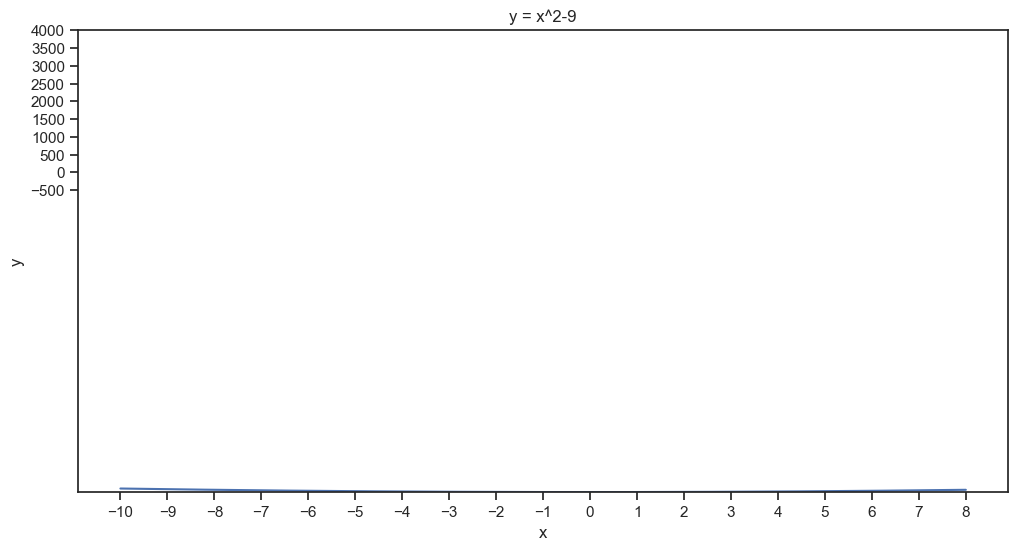

    Iteration     Estimate         Function   Derivative
0           0          1.0         -8,999.0          2.0
1           1      4,500.5    20,245,500.25      9,001.0
2           2 2,251.249889    5,059,126.062 4,502.499778
3           3 1,127.623834    1,262,535.511 2,255.247668
4           4  567.8026095     313,399.8034 1,135.605219
5           5  291.8265942     76,162.76106  583.6531883
6           6  161.3334133     17,028.47025  322.6668266
7           7  108.5592548     2,785.111805  217.1185096
8           8  95.73164371      164.5476067  191.4632874
9           9  94.87222251     0.7386047851   189.744445
10         10  94.86832988  1.515256372e-05  189.7366598
11         11  94.86832981 -1.818989404e-12  189.7366596


In [127]:
import sys
np.set_printoptions(precision = 10, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

pd.options.display.float_format = '{:,.10}'.format

def func (x):
   y = x**2 - 9000
   return (y)

def dfunc(x):
   dy = 2*x
   return (dy)

def newton_raphson (init_x, max_iter = 100, eps_conv = 1e-7, q_history = False):
   i_iter = 0
   q_continue = True
   reason = 0
   x_curr = init_x

   if (q_history):
      history = []
   while (q_continue):
      f_curr = func(x_curr)
      dfunc_curr = dfunc(x_curr)
      if (q_history):
         history.append([i_iter, x_curr, f_curr, dfunc_curr])
      if (f_curr != 0.0):
         if (dfunc_curr != 0.0):
            i_iter = i_iter + 1
            x_next = x_curr - f_curr / dfunc_curr
            if (abs(x_next - x_curr) <= eps_conv):
               q_continue = False
               reason = 1               # Successful convergence
            elif (i_iter >= max_iter):
               q_continue = False
               reason = 2               # Exceeded maximum number of iterations
            else:
               x_curr = x_next
         else:
            q_continue = False
            reason = 3                  # Zero derivative
      else:
         q_continue = False
         reason = 4                     # Zero function value

   if(q_history):
      print(pd.DataFrame(history, columns = ['Iteration', 'Estimate', 'Function', 'Derivative']))

   return (x_curr, reason)

x_value = pd.Series(np.arange(-10.0, 8.1, 0.1), name = 'x')
y_value = x_value.apply(func)
y_value.name = 'y'

plt.figure(figsize = (12,6))
plt.plot(x_value, y_value)
plt.title('y = x^2-9')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(range(-10,9,1))
plt.yticks(range(-500,4500,500))
plt.grid()
plt.show()

x_solution, reason = newton_raphson (init_x = 1, max_iter = 10000, eps_conv = 1e-13, q_history = True)